In [3]:
import json
import matplotlib.pyplot as plt

#Load Mitre Attack Stix data from the uploaded JSON file
with open('/content/enterprise-attack-14.0.json', 'r') as file:
    data = json.load(file)

# Filter out only the relevant information (adversaries and techniques)
relevant_data = {'techniques': []}

# Create a dictionary to store adversaries by ID
adversaries_dict = {item['id']: item['name'] for item in data['objects'] if item['type'] == 'intrusion-set'}


#modified_adversaries_dict = {key.replace("intrusion-set", "attack-pattern"): value for key, value in adversaries_dict.items()}


for item in data['objects']:
        if item['type'] == 'attack-pattern':
            # Extract relevant information about the technique
            technique = {
                'id': item['id'],
                'name': item['name'],
                'description': item['description'],
                'adversaries': []
            }


            # Find relationships with adversaries
            for rel in data['objects']:
                if rel['type'] == 'relationship' and rel['target_ref'] == item['id']:
                    adversary_id = rel['source_ref']
                    adversary_name = adversaries_dict.get(adversary_id)
                    if adversary_name:
                        technique['adversaries'].append({'id': adversary_id, 'name': adversary_name})


            relevant_data['techniques'].append(technique)



with open('/content/reorganized_data.json', 'w') as out_file:
        json.dump(relevant_data, out_file, indent=2)

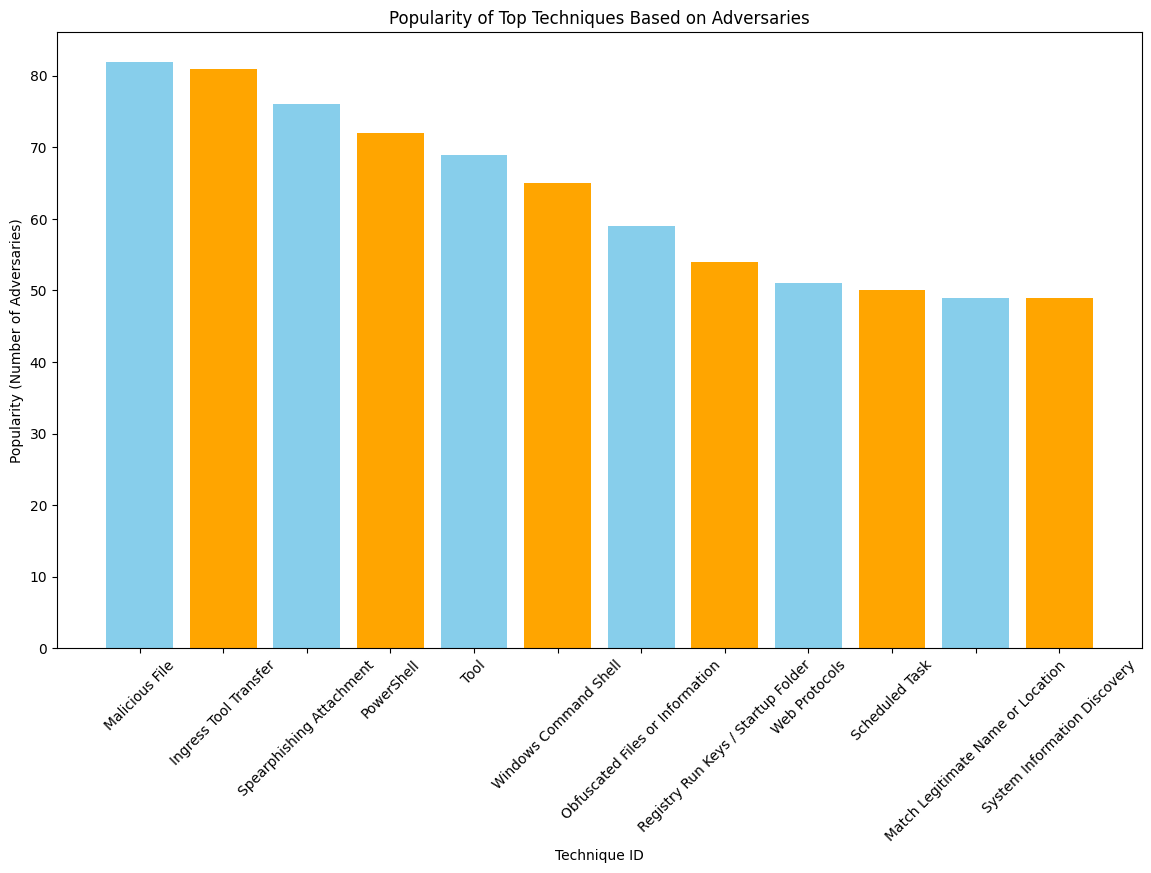

Technique Name: Malicious File, Popularity: 82
Technique Name: Ingress Tool Transfer, Popularity: 81
Technique Name: Spearphishing Attachment, Popularity: 76
Technique Name: PowerShell, Popularity: 72
Technique Name: Tool, Popularity: 69
Technique Name: Windows Command Shell, Popularity: 65
Technique Name: Obfuscated Files or Information, Popularity: 59
Technique Name: Registry Run Keys / Startup Folder, Popularity: 54
Technique Name: Web Protocols, Popularity: 51
Technique Name: Scheduled Task, Popularity: 50
Technique Name: Match Legitimate Name or Location, Popularity: 49
Technique Name: System Information Discovery, Popularity: 49


In [8]:
import random

technique_count = {}

for technique in relevant_data['techniques']:
    for adversary in technique['adversaries']:
        technique_id = technique['id']
        technique_count[technique_id] = technique_count.get(technique_id, 0) + 1

# Sort data for better visualization
sorted_data = sorted(technique_count.items(), key=lambda x: x[1], reverse=True)

# Select the top techniques
top_techniques = sorted_data[:12]

# Extract data for plotting top techniques
technique_ids = [technique[0] for technique in top_techniques]
popularity_counts = [technique[1] for technique in top_techniques]
technique_names = [next(technique['name'] for technique in relevant_data['techniques'] if technique['id'] == technique_id) for technique_id in technique_ids]
# Create a bar chart for the top two techniques
plt.figure(figsize=(14, 8))
bars = plt.bar(technique_names, popularity_counts, color=['skyblue', 'orange'])


plt.xlabel('Technique ID')
plt.ylabel('Popularity (Number of Adversaries)')
plt.title('Popularity of Top Techniques Based on Adversaries')
plt.xticks(rotation=45)
plt.show()

# Extract and print technique name and ID for the top two techniques
for technique_id, popularity_count in top_techniques:
    technique_name = next(technique['name'] for technique in relevant_data['techniques'] if technique['id'] == technique_id)
    print(f"Technique Name: {technique_name}, Popularity: {popularity_count}")

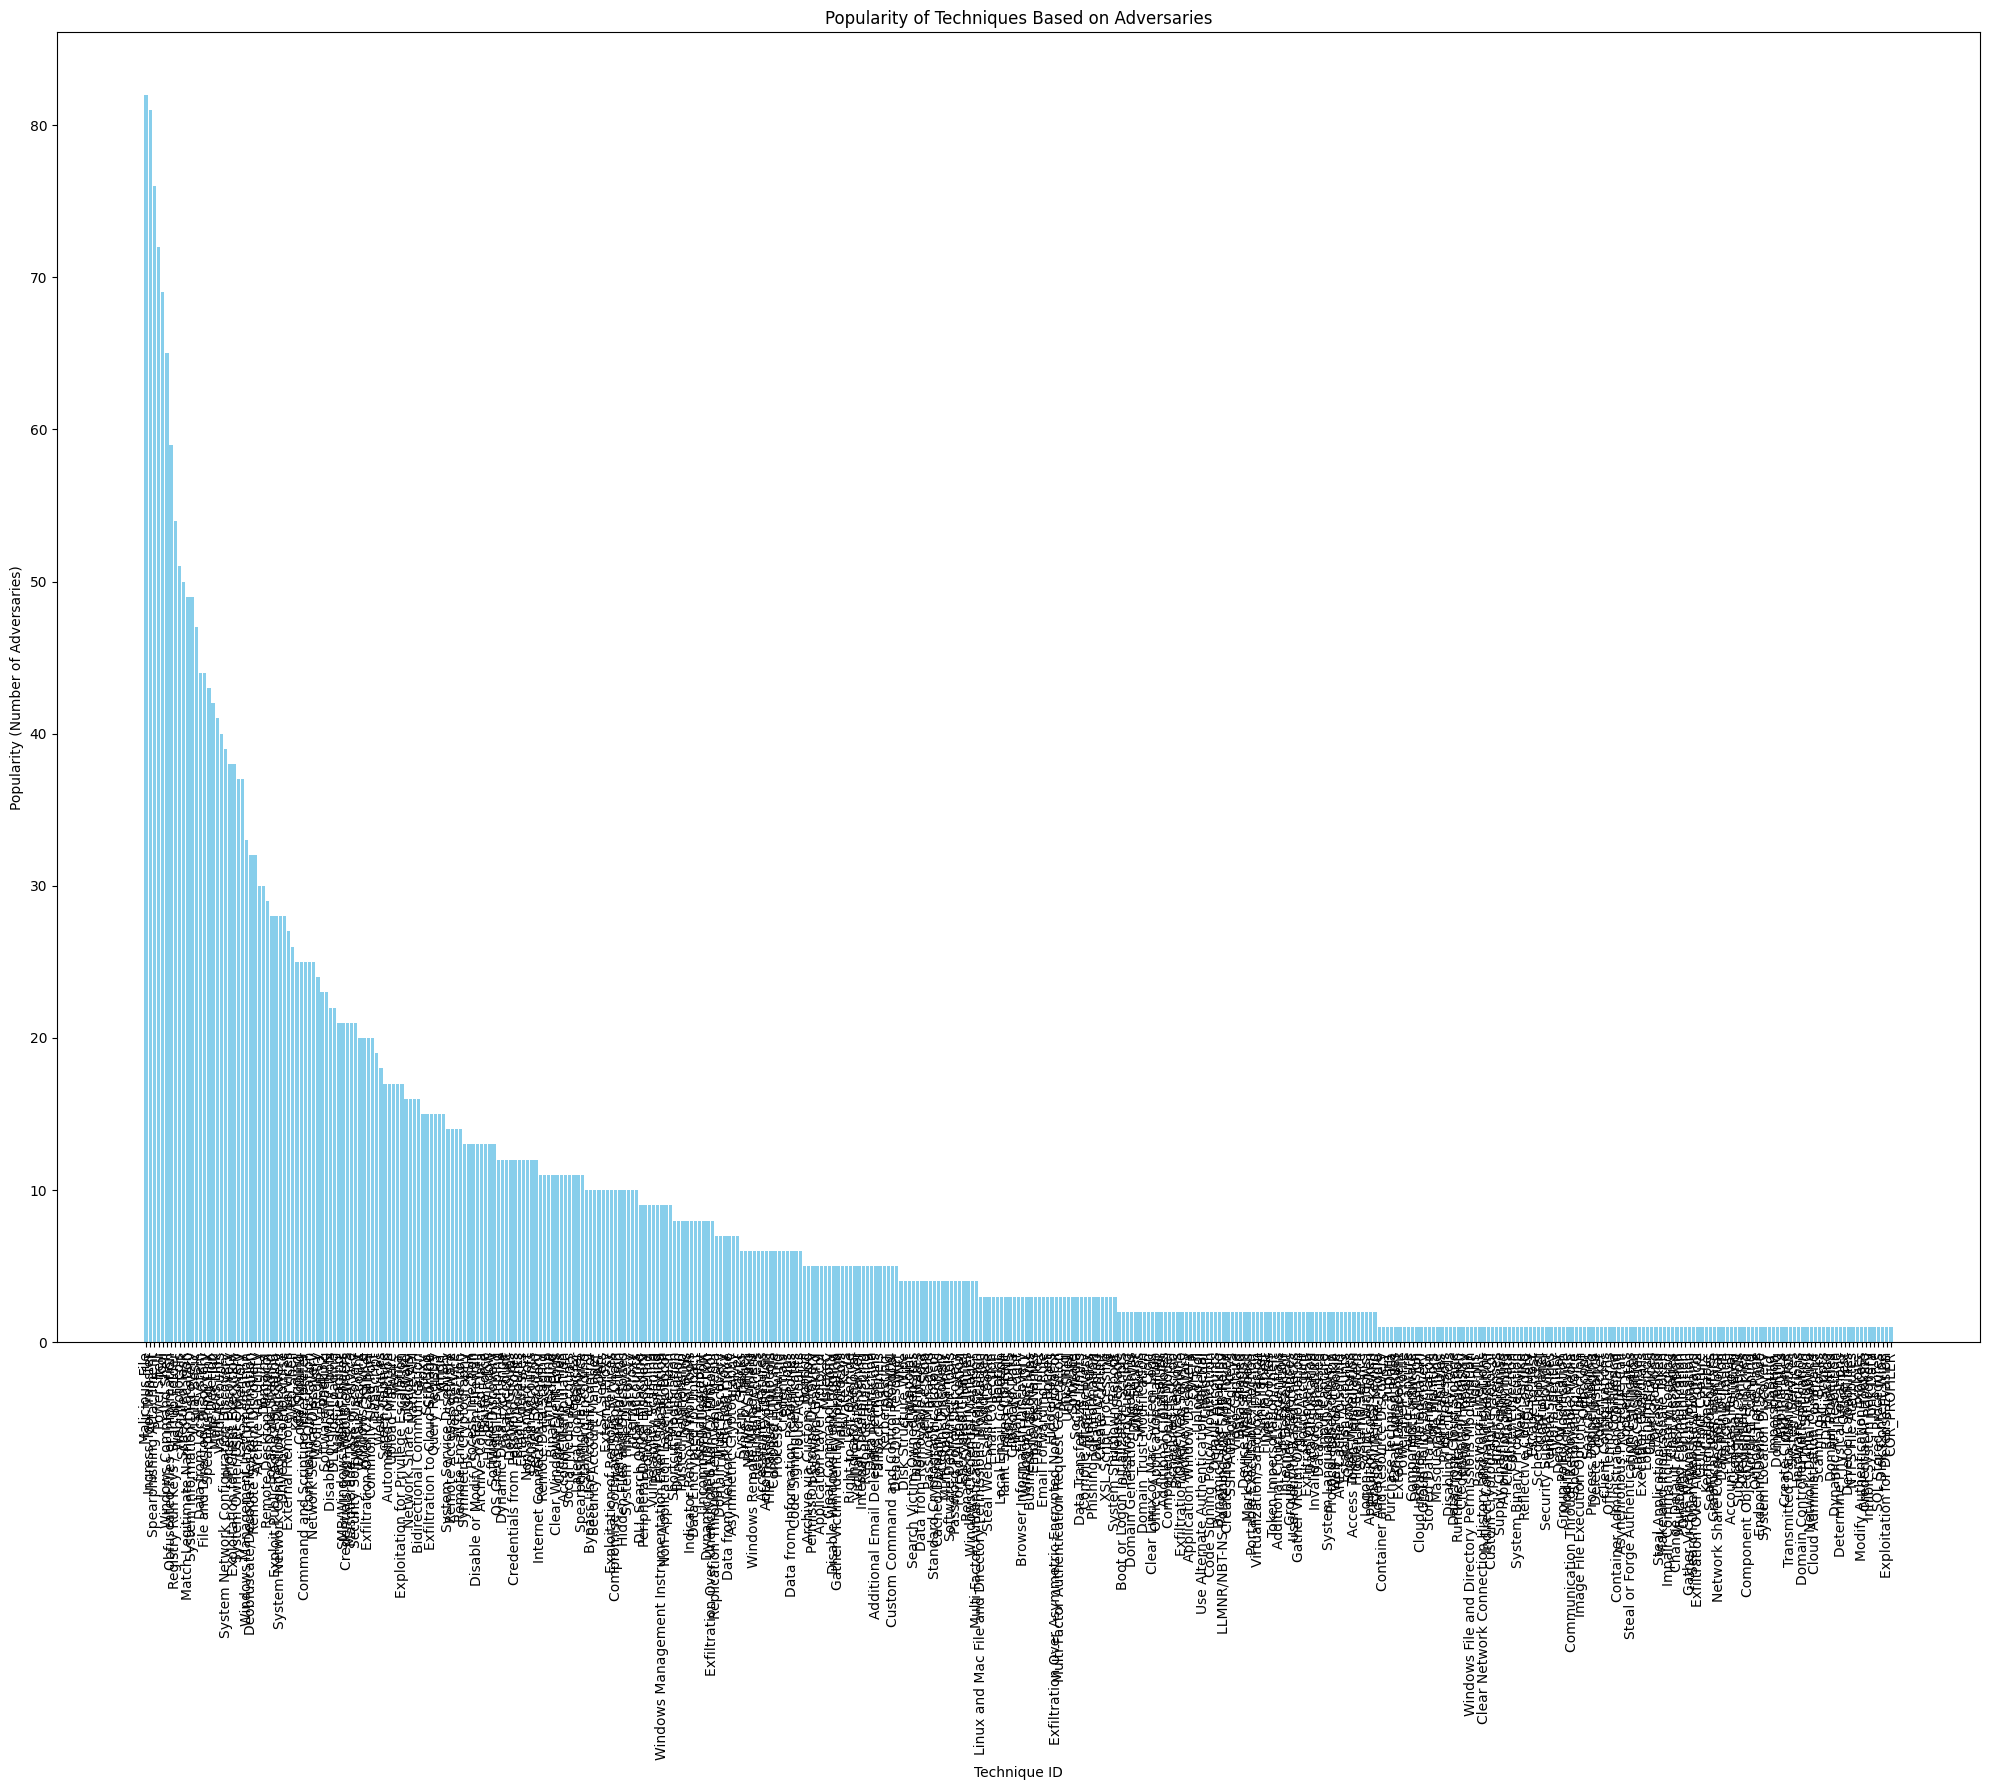

In [9]:
# Sort data for better visualization
sorted_data = sorted(technique_count.items(), key=lambda x: x[1], reverse=True)

# Extract data for plotting for all techniques
technique_ids = [technique[0] for technique in sorted_data]
popularity_counts = [technique[1] for technique in sorted_data]
technique_names = [next(technique['name'] for technique in relevant_data['techniques'] if technique['id'] == technique_id) for technique_id in technique_ids]
# Create a bar chart for all techniques
plt.figure(figsize=(20, 18))
plt.bar(technique_names, popularity_counts, color='skyblue')
plt.xlabel('Technique ID')
plt.ylabel('Popularity (Number of Adversaries)')
plt.title('Popularity of Techniques Based on Adversaries')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the chart
plt.show()